<h1 align='center'>Домашнее задание</h1>

**Дополнительный материал для выполнения дз**:

- Лекция Coursera: https://www.coursera.org/learn/machine-learning?specialization=machine-learning-introduction#modules
s (Week 3 Regularized logistic regression)
- Статья на Хабре: https://habrahabr.ru/company/io/blog/265007/
- Книжка ISLR, 4 глава: http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf
- Логистическая регрессия, UFLDL Tutorial: http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/
- Линейная регрессия, UFLDL Tutorial: http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/


<h1 align='center'>Logistic Regression</h1>

In [2]:
import pandas as pd
import numpy as np
import tqdm # interactive progress bar

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 1. Знакомство с данными
Данные представляют собой выборку отзывов о еде с сайта Амазон. Для них проставлены метки -- положительный или отрицательный отзыв.

In [3]:
train_df = pd.read_csv('./data/train.csv')

In [4]:
print(train_df.shape)

(110163, 3)


In [5]:
train_df.Prediction.value_counts(normalize=True)

Prediction
0    0.50074
1    0.49926
Name: proportion, dtype: float64

Видим, что классы сбалансированы. Можем оценивать качество модели по метрике ```accuracy```.

In [6]:
train_df.head()

,ID,Reviews_Summary,Prediction
0,239071,Michigan Cherries,1
1,466160,Great Product,1
2,397133,Ovaltine,1
3,297146,~,1
4,292685,Love it!,1


In [7]:
train_df.tail()

,ID,Reviews_Summary,Prediction
110158,486256,Terrible!,0
110159,199050,"Cheap Coffee, No Banana Flavor",0
110160,278179,Not as described,0
110161,87500,Tastes like a squirt of toothpaste mixed into ...,0
110162,121963,Disappointed,0



----------
## 2. Извлечение признаков
Для решения задачи классификации необходимо преобразовать каждый отзыв (документ) в вектор. Размерность данного вектора будет равна количеству слов используемых в корпусе (все документы). Каждая координата соответствует слову, значение в координате равно количеству раз, слово используется в документе. 

Для решения данной задачи напишем код, который преобразовывает матрицу документов в численную матрицу.

Дополнительная информация:

- Подробнее про векторное представление документов: http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- Разряженные матрицы: http://www.scipy-lectures.org/advanced/scipy_sparse/
- Трансформер: http://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage
- Подробнее про разреженные матрицы: http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html
- Hashing trick: https://en.wikipedia.org/wiki/Feature_hashing

Помните, что все эти трансформеры возвращают ```sparse```-матрицы. Учитывая это и то, что линейные модели достаточно хорошо масштабируются на большое количество фич, можно смело ставить ```n_features``` 1000+.

In [8]:
review_summaries = list(train_df['Reviews_Summary'].values)
review_summaries = [l.lower() for l in review_summaries]

In [9]:
review_summaries[:5]

['michigan cherries', 'great product', 'ovaltine', '~', 'love it!']

Преобразуем ```review_summaries``` с помощью ```TfidfVectorizer```.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vectorizer = TfidfVectorizer()

In [12]:
tfidfed = vectorizer.fit_transform(review_summaries)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = tfidfed
y = train_df.Prediction.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## 3. Логистическая регрессия

Логистическая регрессия -- линейный классификатор, который очень часто используется на практике, например, в кредитном скоринге. Преимущества этой модели -- скорость обучения и предсказания (даже при сотнях тысяч фичей) а также интепретируемость: важные признаки имеют бОльшие по модулю веса. 

При этом отрицательные веса говорят, что фича важна для определения класса 0, а положительные -- для определения класса 1. Это можно понять, если вспомнить, что разделяющая поверхность линейных моделей, это $w^Tx = 0$, а значение алгоритма есть $a(x) = sign(w^Tx)$.

Будем предсказывать сентимент, подготовим данные и сделаем валидационную выборку. При этом нужно оценивать качество модели не по обучающей выборке, а по валидационной. Иначе вы переобучитесь, когда будете тюнить гиперпараметры модели.

-----
** Реализуйте код в модуле ```dmia.classifiers.logistic_regression```.**

-----

In [15]:
from dmia.gradient_check import *
from dmia.classifiers import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Gradient check

В этой ячейке вы можете проверить, правильно ли у вас все работает, прежде чем обучать модель на всех данных.

In [20]:
X_bias = LogisticRegression.append_biases(X_train_sample)
clf = LogisticRegression()
clf.w = np.random.randn(X_bias.shape[1]) * 2

# ТОЛЬКО SCALAR!
f = lambda w: clf.loss(X_bias, y_train_sample, 0.0)

grad = clf.grad(X_bias, y_train_sample, 0.0)
grad_numerical = grad_check_sparse(f, clf.w, grad, 10)

print("Loss:", f(clf.w))
print("Grad (analytical):", grad[:5])
print("Grad (numerical):", grad_numerical[:5])



/Users/artemziborev/projects/otus-python-pro/Homework-50679-272d56/10_numpy/homework/dmia/gradient_check.py:50: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = abs(grad_numerical - grad_analytic) / (


numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: -0.000001 analytic: -0.000001, relative error: 3.927443e-06
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
Loss: 1.1860077848578043
Grad (analytical): [-1.06898534e-05 -3.93752153e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


TypeError: 'NoneType' object is not subscriptable

Обучите свою модель на ```X_train, y_train```.

Для начала можете взять параметры по умолчанию, и найти оптимальные используя валидацию.

In [21]:
clf = LogisticRegression()

In [23]:
clf.train(
    X_train,
    y_train,
    learning_rate=1e-3,
    reg=1e-5,
    num_iters=1000,
    batch_size=200,
    verbose=True
)


iteration 0/1000: loss 0.69316
iteration 100/1000: loss 0.69306
iteration 200/1000: loss 0.69293
iteration 300/1000: loss 0.69299
iteration 400/1000: loss 0.69281
iteration 500/1000: loss 0.69277
iteration 600/1000: loss 0.69275
iteration 700/1000: loss 0.69270
iteration 800/1000: loss 0.69254
iteration 900/1000: loss 0.69245


[np.float64(0.6931627205686764),
 np.float64(0.6932204693815456),
 np.float64(0.6931725336452745),
 np.float64(0.6931539002918647),
 np.float64(0.6931004078379376),
 np.float64(0.6931598878501607),
 np.float64(0.6931411530673824),
 np.float64(0.6931185054183713),
 np.float64(0.6931577671176563),
 np.float64(0.6931226607493964),
 np.float64(0.6931567876955564),
 np.float64(0.6931156151643052),
 np.float64(0.6931915790131181),
 np.float64(0.6931144685658304),
 np.float64(0.6931359751341724),
 np.float64(0.6931837918787043),
 np.float64(0.6931478943908221),
 np.float64(0.6931182444884779),
 np.float64(0.6931048138271716),
 np.float64(0.693125948371707),
 np.float64(0.6931219970091727),
 np.float64(0.6930911982414673),
 np.float64(0.6930976826058388),
 np.float64(0.69313227783807),
 np.float64(0.6931040827270395),
 np.float64(0.693113592063059),
 np.float64(0.6932047500988047),
 np.float64(0.6931305490500179),
 np.float64(0.6931246049765869),
 np.float64(0.6931382244300479),
 np.float64(0.

Посмотрим на качество на валидации.

In [24]:
print("Train f1-score = %.3f" % accuracy_score(y_train, clf.predict(X_train)))
print("Test f1-score = %.3f" % accuracy_score(y_test, clf.predict(X_test)))

Train f1-score = 0.751
Test f1-score = 0.751


Нарисуем кривые обучения.

In [25]:
clf = LogisticRegression()
train_scores = []
test_scores = []
num_iters = 1000

for i in tqdm.trange(num_iters):
    # Сделайте один шаг градиентного спуска с помощью num_iters=1
    clf.train(X_train, y_train, learning_rate=1.0, num_iters=1, batch_size=256, reg=1e-3)
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

100%|██████████| 1000/1000 [00:07<00:00, 138.50it/s]


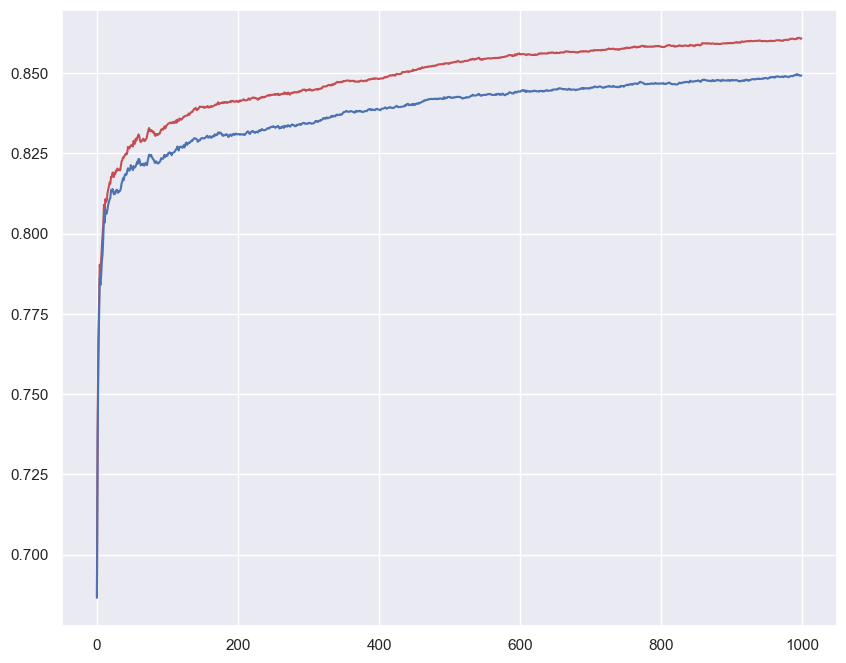

In [26]:
plt.figure(figsize=(10,8))
plt.plot(train_scores, 'r', test_scores, 'b')

## 4. Задание

* Обучим нашу модель **на всех данных**, преобразовав их через ```TfidfVectorizer``` с ```max_features=3000```.

* Параметры модели ```learning_rate=1.0, num_iters=1000, batch_size=256, reg=1e-3``` и выведем первые 5 самых важных фичей для класса 1 и 5 фичей для класса 0. Убедимся, что они коррелируют с вашей интуицией о хороших/плохих отзывах. 

**Hint:** зная индекс фичи, само слово вы можете получить, используя метод ```vectorizer.get_feature_names()```.

**Hint:** ```np.argsort```.

In [27]:
# Обучите модель
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(review_summaries)
y = train_df.Prediction.values
clf = LogisticRegression()
clf.train(X, y, verbose=True, learning_rate=1.0, num_iters=1000, batch_size=256, reg=1e-3)

iteration 0/1000: loss 0.69306
iteration 100/1000: loss 0.62867
iteration 200/1000: loss 0.59503
iteration 300/1000: loss 0.55755
iteration 400/1000: loss 0.55416
iteration 500/1000: loss 0.57994
iteration 600/1000: loss 0.55579
iteration 700/1000: loss 0.55674
iteration 800/1000: loss 0.53385
iteration 900/1000: loss 0.54014


[np.float64(0.6930613378658802),
 np.float64(0.6921160477774759),
 np.float64(0.691052423469794),
 np.float64(0.6903998050498714),
 np.float64(0.689809811030084),
 np.float64(0.6884012939946815),
 np.float64(0.6871700094942053),
 np.float64(0.6866840362313331),
 np.float64(0.6865507160683543),
 np.float64(0.6857618205138782),
 np.float64(0.6843287491557674),
 np.float64(0.6821624236418892),
 np.float64(0.6820884084339435),
 np.float64(0.6827813220386361),
 np.float64(0.6809781776018309),
 np.float64(0.6801476884707245),
 np.float64(0.6777714355690934),
 np.float64(0.67853510294371),
 np.float64(0.6762761785541413),
 np.float64(0.676452217057845),
 np.float64(0.6748334805900108),
 np.float64(0.6738830983619826),
 np.float64(0.6731194763288618),
 np.float64(0.671136285850251),
 np.float64(0.673280413810442),
 np.float64(0.6739340399776511),
 np.float64(0.6723662413508797),
 np.float64(0.6664945518941037),
 np.float64(0.666671738971858),
 np.float64(0.6680261239349014),
 np.float64(0.6668

In [28]:
# Получите индексы фичей
pos_features = np.argsort(clf.w)[-5:]
neg_features = np.argsort(clf.w)[:5]

In [30]:
# Выведите слова
fnames = vectorizer.get_feature_names_out()

print([fnames[p] for p in pos_features])
print([fnames[n] for n in neg_features])

['excellent', 'delicious', 'love', 'best', 'great']
['not', 'disappointed', 'too', 'bad', 'terrible']


## 5. Сравнение с sklearn.linear_model.LogisticRegression

Обучите такую же модель, но из пакета ```sklearn.linear_model``` и убедитесь, что ваша имплементация ничем не хуже (ну или почти не хуже).

In [31]:
from sklearn import linear_model

In [33]:
clf = linear_model.SGDClassifier(
    max_iter=1000,       # ✅ правильно
    random_state=42,
    loss="log_loss",     # ✅ тоже актуально: "log_loss" вместо "log"
    penalty="l2",
    alpha=1e-3,
    eta0=1.0,
    learning_rate="constant"
)

clf.fit(X_train, y_train)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [34]:
print("Train accuracy = %.3f" % accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy = %.3f" % accuracy_score(y_test, clf.predict(X_test)))

Train accuracy = 0.816
Test accuracy = 0.812
